# In this project we will evaluate a real live retrospective intensive care dataset
SICdb contains 27348 intensive care cases from University Hospital Salzburg between 2013 and 2021. A comprehensive aggregated dataset was produces, containing typical values of intensive care, including mortality, base data and several signal and laboratory values. This analyis tries to find out if mortality can be predicted using machine learning, and which parameters have the most significant influence on the model. To limit the dataset, only ICD10 codes begining with "I" (cardiovascular) were analyzed.

# Processing
## Importing Libraries

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

## Reading Data

In [2]:

data = pd.read_csv("../data/export.csv")
data = data.drop(columns=['ICUOffset', 'CaseID'])
data = data.dropna(subset=['ICD10'])
data = data[data['ICD10'].str.startswith('I')]
data # Display Data using jupyter noteook

,AgeOnAdmission,WeightOnAdmission,SAPS3,Sex,ICD10,ICUStayDays,DeceasedHospital,Deceased1Year,OffsetOfDeathDays,hb_baseline,...,crrt_withdrawal_d0,crrt_withdrawal_sum,diuretics,sodium_baseline,potassium_baseline,ph_baseline,be_baseline,gab_baseline,bicarbonate_baseline,pco2_baseline
2,45,85,43,male,I71.0,5.500000,0,0,NaN,89.00,...,NaN,NaN,1,134.0,3.47,7.463,0.7,13.2,24.2,34.5
3,60,80,21,male,I65.2,0.915972,0,0,NaN,1.27,...,NaN,NaN,1,140.0,4.19,NaN,1.6,17.2,26.0,40.0
5,65,110,49,female,I50.12,0.333333,0,0,NaN,45.60,...,NaN,NaN,1,140.0,3.96,7.346,-4.5,NaN,20.7,38.7
8,70,105,30,female,I65.2,1.013889,0,0,NaN,36.10,...,NaN,NaN,1,139.0,4.61,7.335,-1.2,NaN,25.1,48.2
9,75,75,37,female,I48.9,0.040972,0,0,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27340,80,75,33,male,I71.9,1.041667,0,0,NaN,76.00,...,NaN,NaN,1,142.0,4.08,7.360,-3.4,NaN,21.6,39.2
27345,80,70,43,female,I25.1,5.041666,0,0,NaN,116.00,...,NaN,NaN,1,NaN,4.74,7.381,-0.9,10.1,24.2,41.8
27346,65,70,49,male,I73.9,3.089583,0,1,25.55139,1.24,...,NaN,NaN,1,138.0,4.46,7.341,-5.7,13.7,19.4,36.7
27347,60,75,34,female,I26.0,2.333333,0,0,NaN,42.30,...,NaN,NaN,1,NaN,3.90,7.448,-2.2,15.8,20.8,30.7


## To preserve Labels for Plots we use LabelEncoder()

In [3]:
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Create Train/Test Split

In [4]:
y = data['Deceased1Year']
X = data.drop(columns=['Deceased1Year','OffsetOfDeathDays','DeceasedHospital','SAPS3'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Load RandomForestClassifier and Fit the Dataset

In [18]:

rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

## Print Report

In [19]:
# Evaluate the model
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:",accuracy)
print(report)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1629
           1       1.00      1.00      1.00       244

    accuracy                           1.00      1873
   macro avg       1.00      1.00      1.00      1873
weighted avg       1.00      1.00      1.00      1873



## Plot the Confusion Matrix

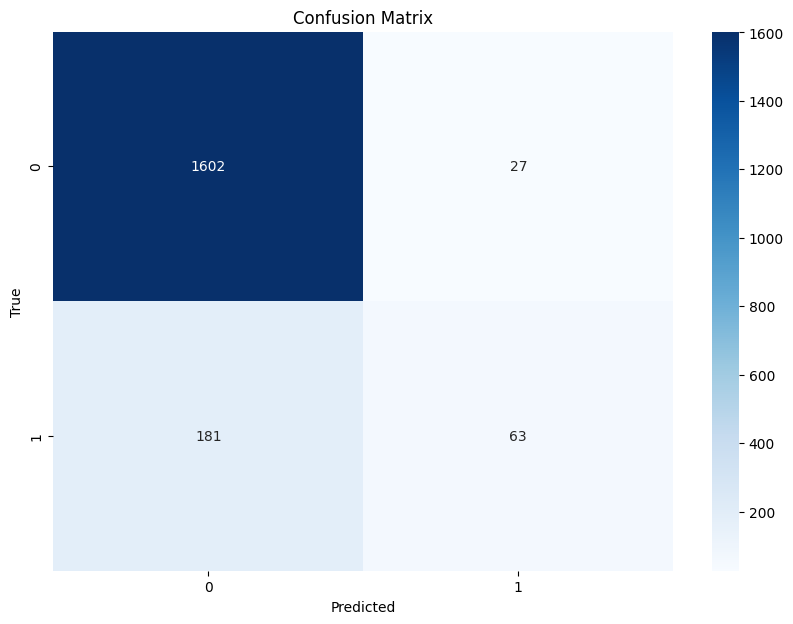

In [7]:

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## To find out which Fields are of most interest we get the Feature Importances

C:\Users\micro\AppData\Local\Temp\ipykernel_8420\3454902279.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


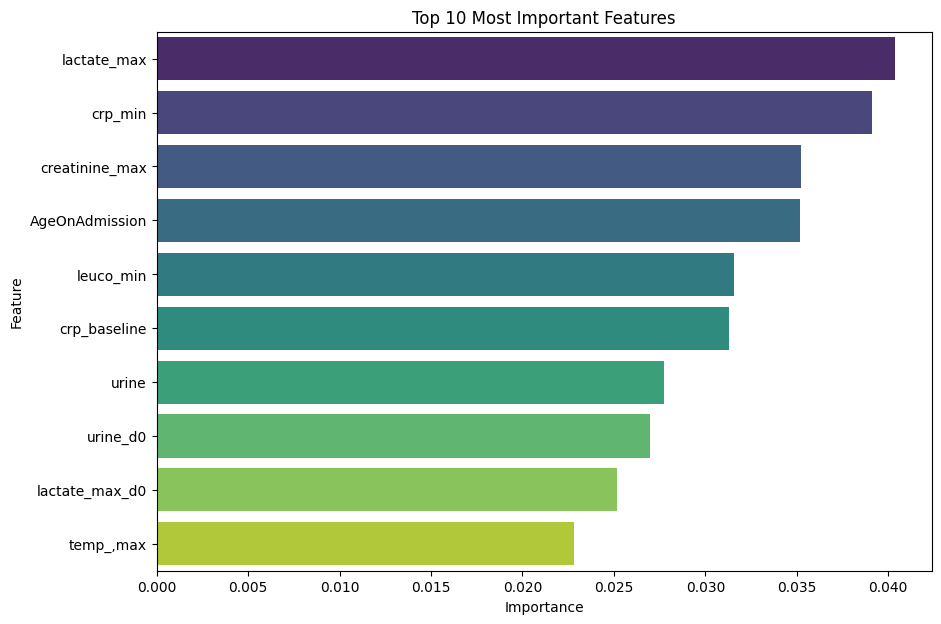

In [8]:

feature_importances = rf_clf.feature_importances_
features = X.columns

# To DataFrame
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Select the most important 10 features
top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot the top 10 features
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.show()

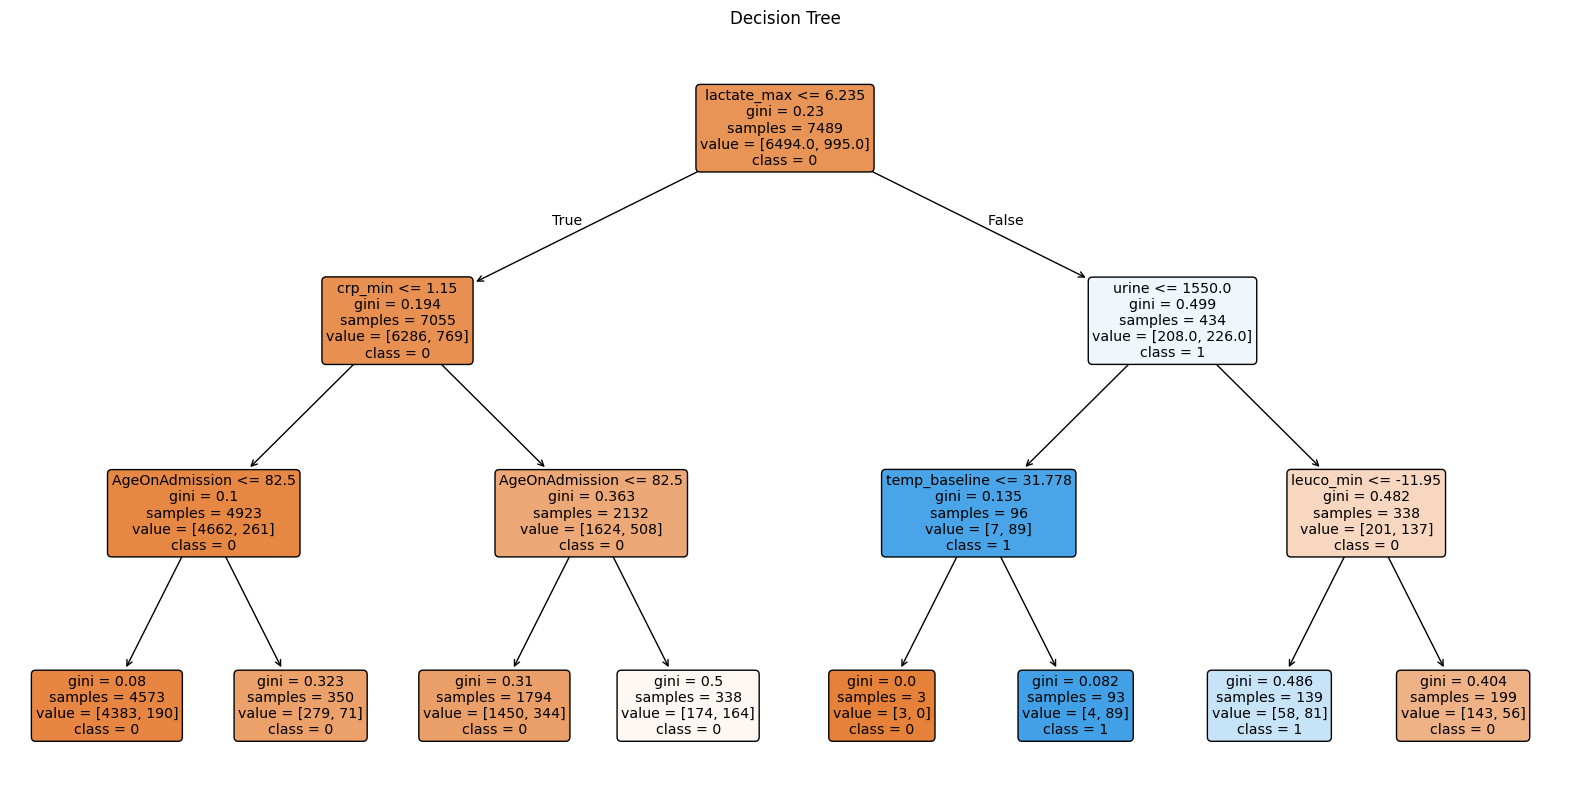

In [20]:
dt_clf = DecisionTreeClassifier(random_state=42,max_depth=3)
dt_clf.fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=[str(c) for c in dt_clf.classes_], rounded=True)
plt.title('Decision Tree')
plt.show()

## For Comparison, a Gradient Boosting Classifier was additionally trained

In [11]:
# Train a Gradient Boosting classifier
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
# Evaluate the model
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8964228510411105
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1629
           1       0.69      0.37      0.48       244

    accuracy                           0.90      1873
   macro avg       0.80      0.67      0.71      1873
weighted avg       0.88      0.90      0.88      1873



# Conclusion
Both models have a high overall accuracy, demonstrating robustness in predicting ICU outcomes. Analysing the RandomForestClassifier, the sensitivity for predicting survival (class 0) is excellent, with a recall of 0.98, indicating that almost all patients who survived were correctly identified. However, the sensitivity for predicting mortality (class 1) is lower, with a recall of 0.37, showing that many deceased cases were missed. The precision for predicting survival is also high at 0.91, reflecting that most predicted survivors indeed survived. On the other hand, the precision for predicting mortality is 0.69, indicating that while fewer deceased cases were correctly predicted, those that were predicted had a higher likelihood of being accurate.

Unfortunately, it is seen that the "deceased" class is underrepresented, resulting in a low precision. This class imbalance means that there are significantly fewer instances of deceased patients compared to survivors, making it challenging for the model to learn the distinguishing features of the deceased class effectively. Consequently, the model predicts a higher number of false positives for the deceased class, reducing its precision. This underrepresentation also affects the recall of the deceased class, as many actual deceased cases are not correctly identified.

As for the features, lactate max was the most important, aligning with scientific knowledge that high lactate levels are critical indicators of patient severity. Additionally, crp_min (C-reactive protein minimum) was highly significant, likely because it suggests that the patient left the intensive care unit in good condition. The importance of creatinine max was also expected, as it correlates with acute kidney injury (AKI), which is known to significantly impact mortality rates. Age on admission is in the 4th place, which is not surprising, but the severity of illness holds even higher importance. Additionally, urine output is of high significance, not only because it indicates acute kidney injury (AKI), but also because low urine output is a critical indicator of severe sepsis.
At the 10th place is maximum temperature. This may indicate a selection bias due to the specific filter of ICD codes beginning with "I," which overselects patients with sternotomy, who often experience fever even when recovery is progressing well. 

Additionally, it is important to note that, as a single-center retrospective study, the model is likely highly overfitted. To address this issue, similar datasets from other clinics would be needed to validate and generalize the model's findings.

# Knowledge Discovery

In the process of knowledge discovery, I learned that class imbalance can significantly impact the performance and accuracy of predictive models, particularly in identifying minority classes. Addressing this imbalance through techniques like resampling, adjusting class weights, and using appropriate evaluation metrics is crucial for developing robust and reliable machine learning models.